<a href="https://colab.research.google.com/github/AbhishekA87/ML_Files/blob/main/Global_Employment_and_GDP_Trends_EDA_(1991_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Global Employment & GDP Trends (1991-2022)

## Table


1. Importing Libraries and Dataset
2. Dataset Overview and Data Cleaning/Engineering
3. Trends: Employment/Unemployment Over Years
4. Agricultural Employment Trends
5. Correlation of Key Economic Indicators
6. Identifying Top and Bottom Countries by GDP
7. Target- To Evaluate the market in next 20 years



In [46]:
# Upload the data from a public url
import requests
url = "https://www.kaggle.com/datasets/akshatsharma2/global-jobs-gdp-and-unemployment-data-19912022"
r = requests.get(url, allow_redirects=True)
open('data.zip', 'wb').write(r.content)

11288

In [54]:
!pip install kaggle

In [56]:
import os
os.environ['KAGGLE_USERNAME'] = "abhisheksharma87"
os.environ['KAGGLE_KEY'] = "c7c2afa6c53603360a3787241e925edd"

!kaggle datasets download -d akshatsharma2/global-jobs-gdp-and-unemployment-data-19912022 -p ./data --unzip


Dataset URL: https://www.kaggle.com/datasets/akshatsharma2/global-jobs-gdp-and-unemployment-data-19912022
License(s): world-bank
  0% 0.00/228k [00:00<?, ?B/s]
100% 228k/228k [00:00<00:00, 603MB/s]


In [57]:
import pandas as pd
df = pd.read_csv('/content/data/Employment_Unemployment_GDP_data.csv')
df.head()

Country Name  Year  Employment Sector: Agriculture  \
0      Albania  1991                       53.299533   
1      Algeria  1991                       24.118566   
2       Angola  1991                       40.071857   
3    Argentina  1991                       13.669999   
4      Armenia  1991                       54.263252   

   Employment Sector: Industry  Employment Sector: Services  \
0                    12.172764                    34.527781   
1                    25.067734                    50.813700   
2                     8.163345                    51.764822   
3                    28.505903                    57.824098   
4                    15.790454                    29.946294   

   Unemployment Rate  GDP (in USD)  
0             10.304  1.099559e+09  
1             20.600  4.571568e+10  
2             16.855  1.060378e+10  
3              5.440  1.897200e+11  
4              1.783  2.069870e+09

In [58]:
#Importing the Important Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    5751 non-null   object 
 1   Year                            5751 non-null   int64  
 2   Employment Sector: Agriculture  5751 non-null   float64
 3   Employment Sector: Industry     5751 non-null   float64
 4   Employment Sector: Services     5751 non-null   float64
 5   Unemployment Rate               5751 non-null   float64
 6   GDP (in USD)                    5751 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 314.6+ KB


In [60]:
df.isnull()

Country Name   Year  Employment Sector: Agriculture  \
0            False  False                           False   
1            False  False                           False   
2            False  False                           False   
3            False  False                           False   
4            False  False                           False   
...            ...    ...                             ...   
5746         False  False                           False   
5747         False  False                           False   
5748         False  False                           False   
5749         False  False                           False   
5750         False  False                           False   

      Employment Sector: Industry  Employment Sector: Services  \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
4                           False                        False   
...                           ...                          ...   
5746                        False                        False   
5747                        False                        False   
5748                        False                        False   
5749                        False                        False   
5750                        False                        False   

      Unemployment Rate  GDP (in USD)  
0                 False         False  
1                 False         False  
2                 False         False  
3                 False         False  
4                 False         False  
...                 ...           ...  
5746              False         False  
5747              False         False  
5748              False         False  
5749              False         False  
5750              False         False  

[5751 rows x 7 columns]

In [61]:
df.head()

Country Name  Year  Employment Sector: Agriculture  \
0      Albania  1991                       53.299533   
1      Algeria  1991                       24.118566   
2       Angola  1991                       40.071857   
3    Argentina  1991                       13.669999   
4      Armenia  1991                       54.263252   

   Employment Sector: Industry  Employment Sector: Services  \
0                    12.172764                    34.527781   
1                    25.067734                    50.813700   
2                     8.163345                    51.764822   
3                    28.505903                    57.824098   
4                    15.790454                    29.946294   

   Unemployment Rate  GDP (in USD)  
0             10.304  1.099559e+09  
1             20.600  4.571568e+10  
2             16.855  1.060378e+10  
3              5.440  1.897200e+11  
4              1.783  2.069870e+09

In [62]:
#Rename the headers to shorter
df = df.rename(columns={
    'Country Name': 'Country',
    'Year': 'Year',
    'Employment Sector: Agriculture': 'Agri',
    'Employment Sector: Industry': 'Industry',
    'Employment Sector: Services': 'Services',
    'Unemployment Rate': 'Unemp',
    'GDP (in USD)': 'GDP(in USD)'
})


In [63]:
df.head()

Country  Year       Agri   Industry   Services   Unemp   GDP(in USD)
0    Albania  1991  53.299533  12.172764  34.527781  10.304  1.099559e+09
1    Algeria  1991  24.118566  25.067734  50.813700  20.600  4.571568e+10
2     Angola  1991  40.071857   8.163345  51.764822  16.855  1.060378e+10
3  Argentina  1991  13.669999  28.505903  57.824098   5.440  1.897200e+11
4    Armenia  1991  54.263252  15.790454  29.946294   1.783  2.069870e+09

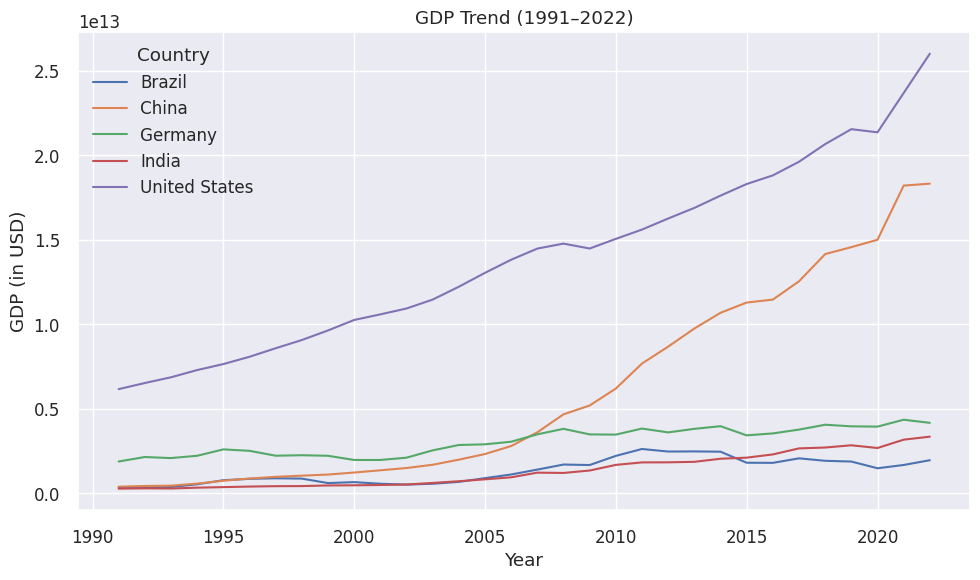

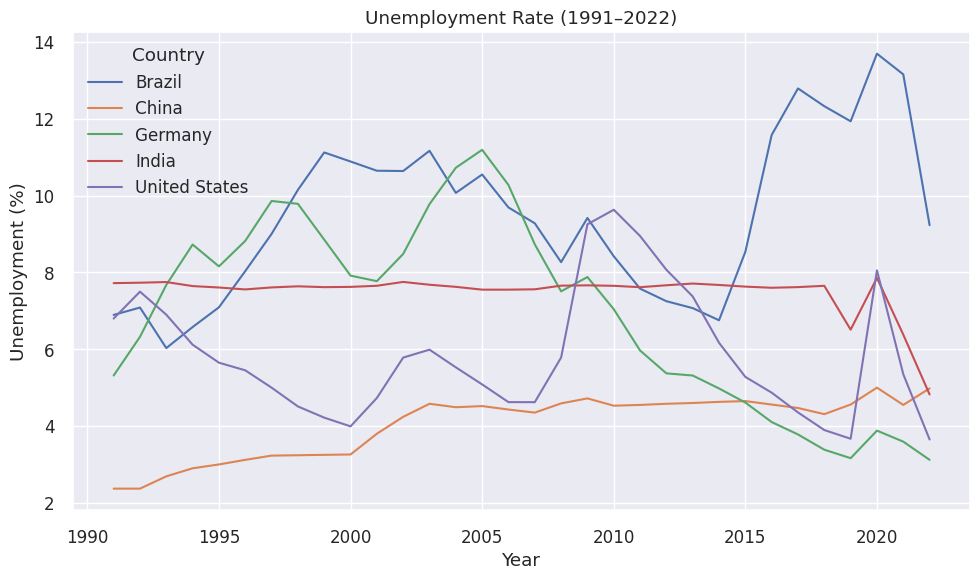

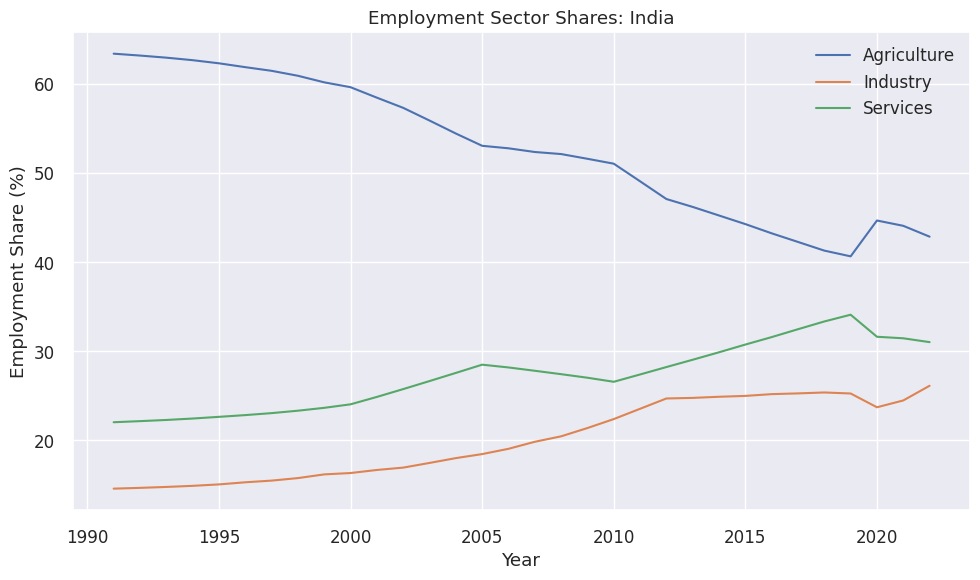


Top 10 Countries by Average GDP (1991–2022):
          Country   GDP(in USD)
0   United States  1.397386e+13
1           China  5.978173e+12
2           Japan  4.858619e+12
3         Germany  3.064907e+12
4  United Kingdom  2.254127e+12
5          France  2.163477e+12
6           Italy  1.736499e+12
7           India  1.328646e+12
8          Brazil  1.312878e+12
9          Canada  1.237125e+12


/tmp/ipython-input-965114974.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




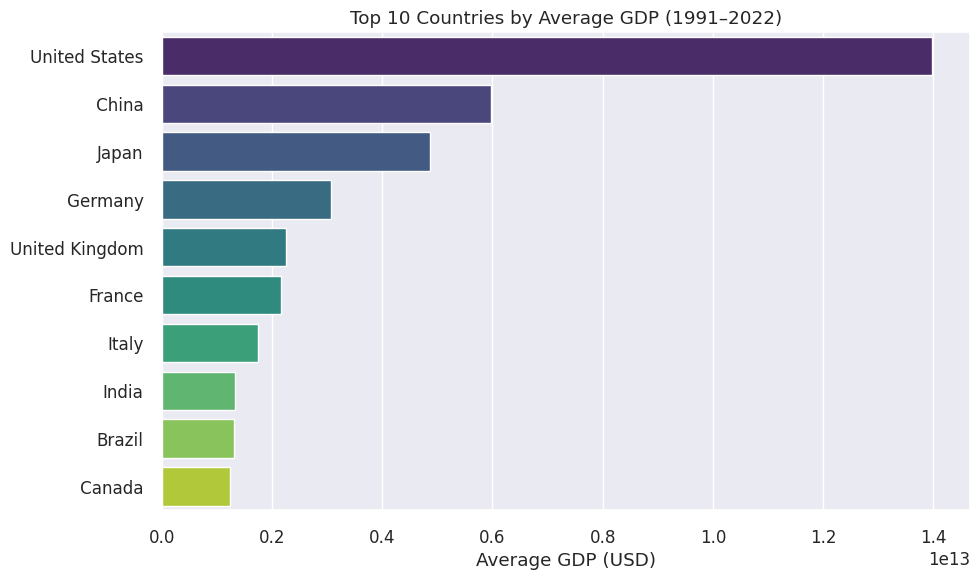

In [64]:
# Example: Pick a few countries to visualize
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

sample_countries = ["United States", "China", "India", "Germany", "Brazil"]
subset = df[df['Country'].isin(sample_countries)]

#visualizing the dataset for gdp
plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x="Year", y="GDP(in USD)", hue="Country", color = 'multi')
plt.title("GDP Trend (1991–2022)")
plt.ylabel("GDP (in USD)")
plt.xlabel("Year")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

# Unemployment trend
plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x="Year", y="Unemp", hue="Country")
plt.title("Unemployment Rate (1991–2022)")
plt.ylabel("Unemployment (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Employment sector shares for one example country (e.g., India)
example_country = "India"
ex_df = df[df["Country"] == example_country]

plt.figure(figsize=(10,6))
plt.plot(ex_df["Year"], ex_df["Agri"], label="Agriculture")
plt.plot(ex_df["Year"], ex_df["Industry"], label="Industry")
plt.plot(ex_df["Year"], ex_df["Services"], label="Services")
plt.title(f"Employment Sector Shares: {example_country}")
plt.ylabel("Employment Share (%)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

# Top 10 countries by GDP

# Average GDP over the entire period
top10 = (
    df.groupby("Country")["GDP(in USD)"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

print("\nTop 10 Countries by Average GDP (1991–2022):")
print(top10)

# Bar chart of top 10
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="GDP(in USD)", y="Country", palette="viridis")
plt.title("Top 10 Countries by Average GDP (1991–2022)")
plt.xlabel("Average GDP (USD)")
plt.ylabel("")
plt.tight_layout()
plt.show()


Visualizing the Global Data as well


In [65]:
# Compute global aggregates
# Global GDP = SUM of GDP across all countries
# Unemployment & sector shares = unweighted MEAN (no population data available)
global_df = (
    df.groupby("Year")
      .agg({
          "GDP(in USD)": "sum",
          "Unemp": "mean",
          "Agri": "mean",
          "Industry": "mean",
          "Services": "mean"
      })
      .reset_index()
      .sort_values("Year")
)




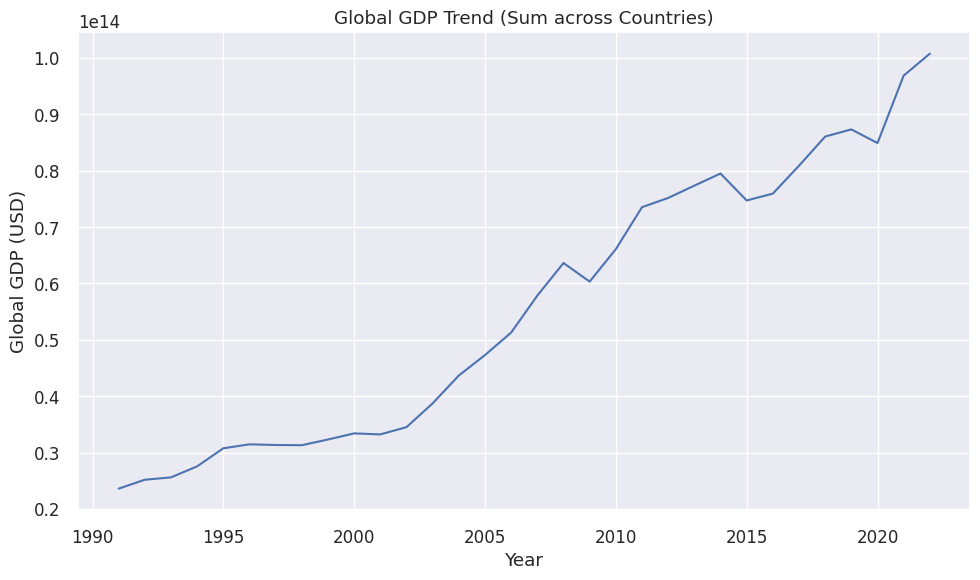

In [66]:
# Global GDP trend

plt.figure(figsize=(10,6))
sns.lineplot(data=global_df, x="Year", y="GDP(in USD)")
plt.title("Global GDP Trend (Sum across Countries)")
plt.ylabel("Global GDP (USD)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()



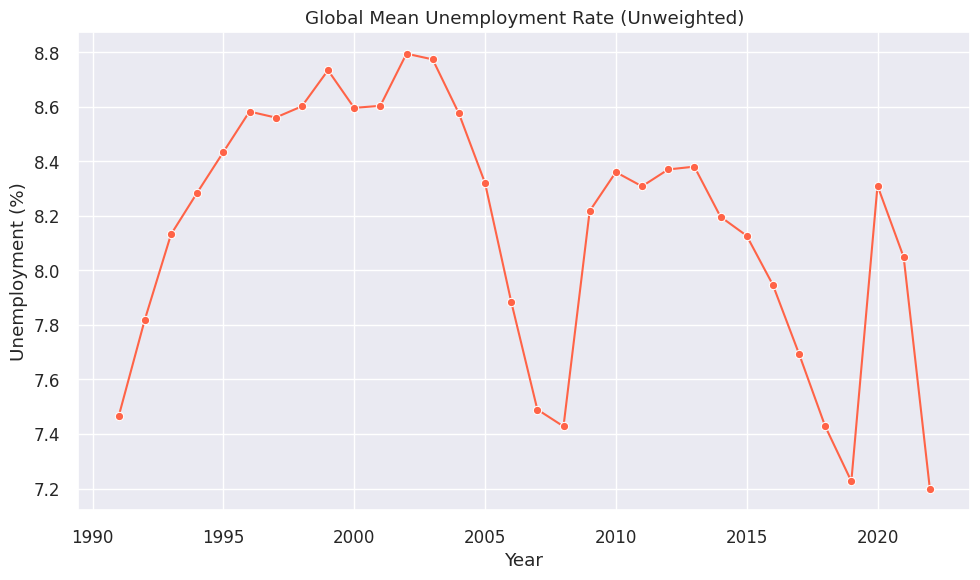

In [67]:

# Global Unemployment trend

plt.figure(figsize=(10,6))
sns.lineplot(data=global_df, x="Year", y="Unemp", color="tomato", marker="o", markersize=6  )
plt.title("Global Mean Unemployment Rate (Unweighted)")
plt.ylabel("Unemployment (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


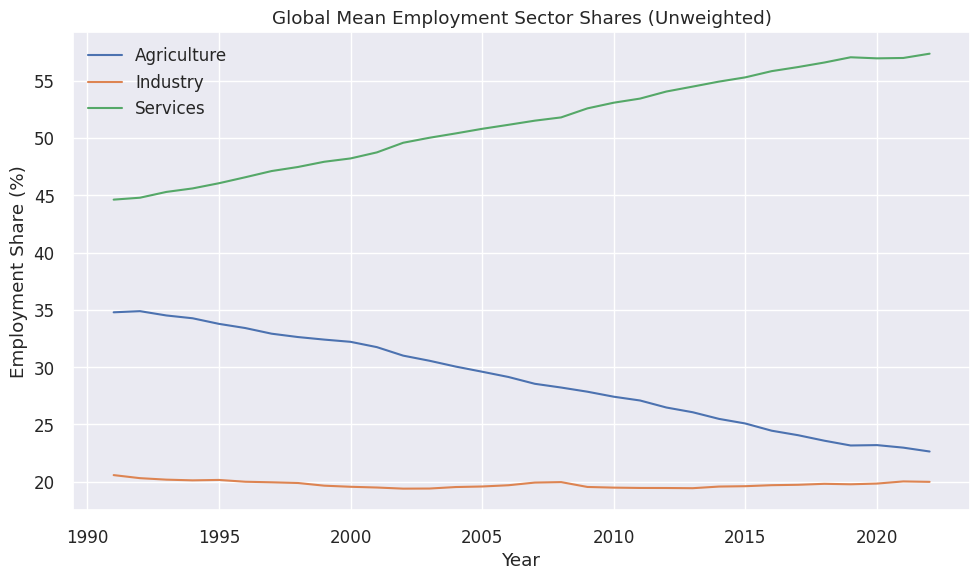

In [68]:
# Global Employment sector shares

plt.figure(figsize=(10,6))
plt.plot(global_df["Year"], global_df["Agri"], label="Agriculture")
plt.plot(global_df["Year"], global_df["Industry"], label="Industry")
plt.plot(global_df["Year"], global_df["Services"], label="Services")
plt.title("Global Mean Employment Sector Shares (Unweighted)")
plt.ylabel("Employment Share (%)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()



#Finding the Global Leaders (top 5) in every sector

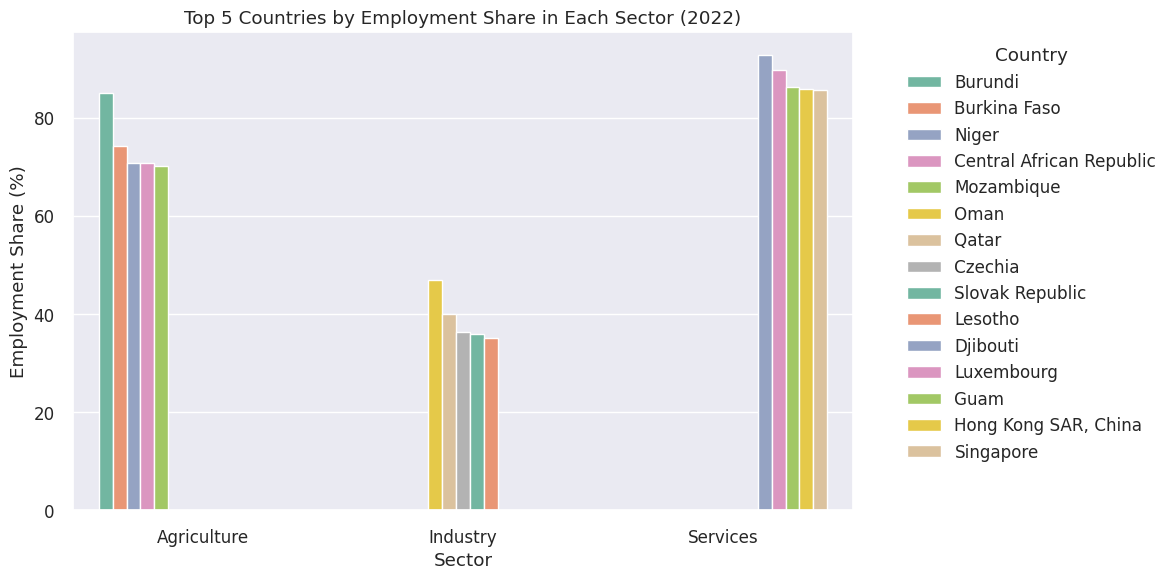

In [69]:
# Select the latest year
latest_year = df["Year"].max()
latest = df[df["Year"] == latest_year]

# Find top 5 countries in each sector
top_agri = latest.nlargest(5, "Agri")[["Country", "Agri"]].assign(Sector="Agriculture", Value=lambda x: x["Agri"])
top_ind  = latest.nlargest(5, "Industry")[["Country", "Industry"]].assign(Sector="Industry", Value=lambda x: x["Industry"])
top_serv = latest.nlargest(5, "Services")[["Country", "Services"]].assign(Sector="Services", Value=lambda x: x["Services"])

# Combine results into one DataFrame
top_all = pd.concat([top_agri[["Country","Sector","Value"]],
                     top_ind[["Country","Sector","Value"]],
                     top_serv[["Country","Sector","Value"]]])

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=top_all,
            x="Sector", y="Value", hue="Country",
            palette="Set2")
plt.title(f"Top 5 Countries by Employment Share in Each Sector ({latest_year})")
plt.ylabel("Employment Share (%)")
plt.xlabel("Sector")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#Finding the top countries growth by sector

/tmp/ipython-input-3984826702.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipython-input-3984826702.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3984826702.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3984826702.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` an

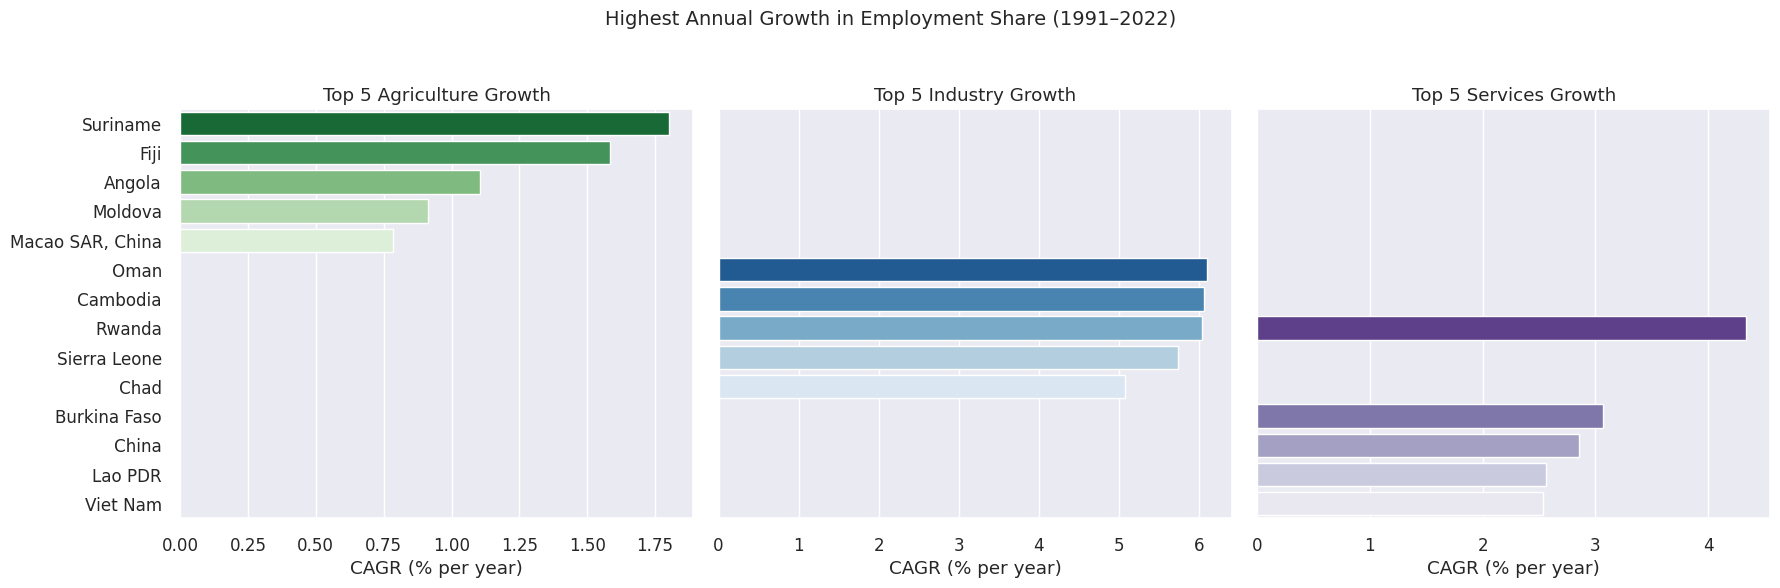

In [70]:
# Compute sector growth per country. We'll calculate compound annual growth rate (CAGR) for each sector

def calc_cagr(group, col):
    start_val = group.loc[group["Year"].idxmin(), col]
    end_val   = group.loc[group["Year"].idxmax(), col]
    n_years   = group["Year"].max() - group["Year"].min()
    if n_years > 0 and start_val > 0:
        return (end_val / start_val) ** (1/n_years) - 1
    else:
        return np.nan

growth = (
    df.groupby("Country")
      .apply(lambda g: pd.Series({
          "Agri_CAGR": calc_cagr(g, "Agri"),
          "Industry_CAGR": calc_cagr(g, "Industry"),
          "Services_CAGR": calc_cagr(g, "Services")
      }))
      .reset_index()
)

# Convert to percentage
growth[["Agri_CAGR","Industry_CAGR","Services_CAGR"]] *= 100


# Top 5 countries by growth in each sector

top_agri = growth.nlargest(5, "Agri_CAGR")[["Country","Agri_CAGR"]].assign(Sector="Agriculture", Value=lambda x: x["Agri_CAGR"])
top_ind  = growth.nlargest(5, "Industry_CAGR")[["Country","Industry_CAGR"]].assign(Sector="Industry", Value=lambda x: x["Industry_CAGR"])
top_serv = growth.nlargest(5, "Services_CAGR")[["Country","Services_CAGR"]].assign(Sector="Services", Value=lambda x: x["Services_CAGR"])

# Combine for plotting
top_all = pd.concat([
    top_agri[["Country","Sector","Value"]],
    top_ind[["Country","Sector","Value"]],
    top_serv[["Country","Sector","Value"]]
])


# Plot grouped bar chart

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

sns.barplot(data=top_agri, x="Agri_CAGR", y="Country", palette="Greens_r", ax=axes[0])
axes[0].set_title("Top 5 Agriculture Growth")
axes[0].set_xlabel("CAGR (% per year)")
axes[0].set_ylabel("")

sns.barplot(data=top_ind, x="Industry_CAGR", y="Country", palette="Blues_r", ax=axes[1])
axes[1].set_title("Top 5 Industry Growth")
axes[1].set_xlabel("CAGR (% per year)")
axes[1].set_ylabel("")

sns.barplot(data=top_serv, x="Services_CAGR", y="Country", palette="Purples_r", ax=axes[2])
axes[2].set_title("Top 5 Services Growth")
axes[2].set_xlabel("CAGR (% per year)")
axes[2].set_ylabel("")

plt.suptitle("Highest Annual Growth in Employment Share (1991–2022)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# We will visualise using a more interactive dashboard to select the country and year, and compare with the country with highest sector figures of that year

In [71]:
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Output


In [72]:
# Dropdown options
countries = sorted(df["Country"].unique())
years     = sorted(df["Year"].unique())
sectors   = ["Agri", "Industry", "Services"]

# Widgets
country_dd = widgets.Dropdown(options=countries, value="India", description="Country:")
year_dd    = widgets.Dropdown(options=years, value=max(years), description="Year:")
sector_dd  = widgets.Dropdown(options=sectors, value="Industry", description="Top Sector:")

# Output areas
plot_out    = Output()
country_out = Output()
leader_out  = Output()
compare_out = Output()

def update_viz(*args):
    plot_out.clear_output(wait=True)
    country_out.clear_output(wait=True)
    leader_out.clear_output(wait=True)
    compare_out.clear_output(wait=True)

    ctry = country_dd.value
    yr   = year_dd.value
    sec  = sector_dd.value

    #Country sector bar chart
    row = df[(df["Country"] == ctry) & (df["Year"] == yr)]
    if not row.empty:
        melted = row.melt(
            id_vars=["Country","Year"],
            value_vars=["Agri","Industry","Services"],
            var_name="Sector",
            value_name="Employment Share (%)"
        )
        fig = px.bar(
            melted,
            x="Sector",
            y="Employment Share (%)",
            color="Sector",
            text="Employment Share (%)",
            title=f"Employment Shares in {ctry} ({yr})"
        )
        fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
        fig.update_layout(yaxis_range=[0, max(100, melted["Employment Share (%)"].max()+10)])
        with plot_out:
            fig.show()
        with country_out:
            display(row[["Country","Year","Agri","Industry","Services","Unemp","GDP(in USD)"]])
    else:
        with plot_out:
            print("No data for this Country/Year.")

    # Top country in selected sector
    sector_rows = df[df["Year"] == yr]
    if not sector_rows.empty:
        top_row = sector_rows.loc[sector_rows[sec].idxmax()]
        with leader_out:
            print(f"🌟 Top country in **{sec}** sector ({yr})")
            print(f"Country : {top_row['Country']}")
            print(f"{sec} share : {top_row[sec]:.2f}%")

        #Comparison table
        if not row.empty:
            compare_df = pd.DataFrame({
                "Metric": ["Agri","Industry","Services","Unemp","GDP(in USD)"],
                f"{ctry} ({yr})": [
                    row["Agri"].values[0],
                    row["Industry"].values[0],
                    row["Services"].values[0],
                    row["Unemp"].values[0],
                    row["GDP(in USD)"].values[0],
                ],
                f"{top_row['Country']} ({yr})": [
                    top_row["Agri"],
                    top_row["Industry"],
                    top_row["Services"],
                    top_row["Unemp"],
                    top_row["GDP(in USD)"],
                ]
            })
            with compare_out:
                print("\n🔎 Comparison Table")
                display(compare_df)

# Link updates
for w in (country_dd, year_dd, sector_dd):
    w.observe(update_viz, names="value")

# Initial display
update_viz()

# Layout in notebook
VBox([
    HBox([country_dd, year_dd, sector_dd]),
    plot_out,
    country_out,
    leader_out,
    compare_out
])


# Creating a correlation Matrix for different industries and see the top 10 and bottom 10 countries by gdp and unemployment rates

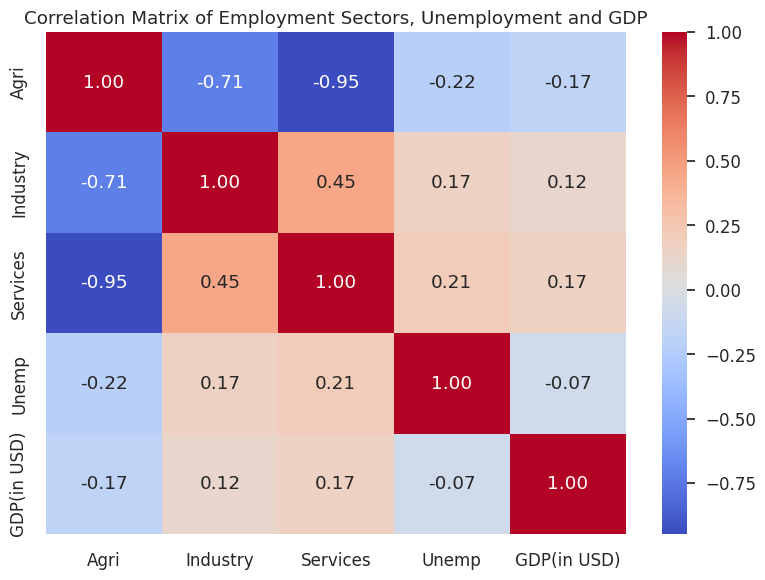

/tmp/ipython-input-341146796.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-341146796.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-341146796.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-341146796.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




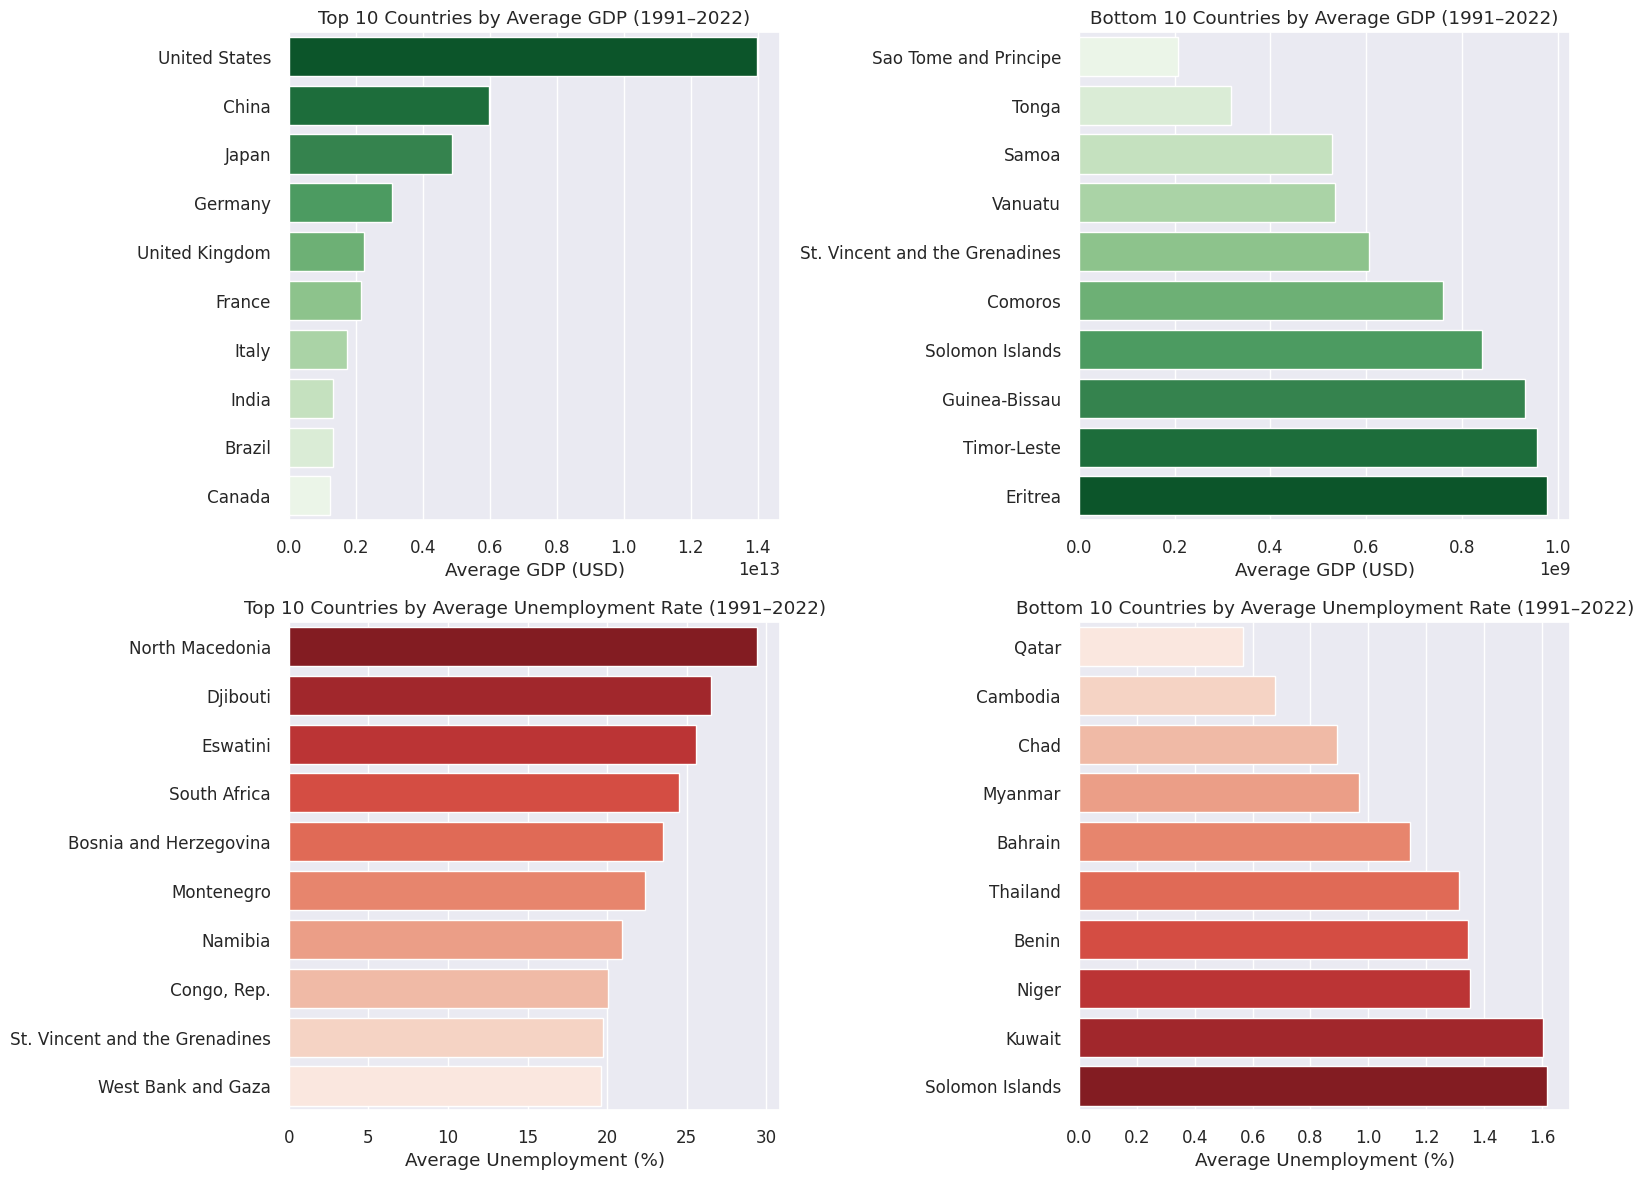

In [73]:
#Correlation Matrix (across all countries/years)

# Select only numeric columns
num_cols = ["Agri","Industry","Services","Unemp","GDP(in USD)"]
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Employment Sectors, Unemployment and GDP")
plt.tight_layout()
plt.show()


# Compute average GDP & Unemployment per country

country_stats = (
    df.groupby("Country")[["GDP(in USD)", "Unemp"]]
      .mean()
      .sort_values("GDP(in USD)", ascending=False)
      .reset_index()
)

# Top/Bottom 10 by GDP
top10_gdp    = country_stats.nlargest(10, "GDP(in USD)")
bottom10_gdp = country_stats.nsmallest(10, "GDP(in USD)")

# Top/Bottom 10 by Unemployment (highest/lowest rates)
top10_unemp    = country_stats.nlargest(10, "Unemp")
bottom10_unemp = country_stats.nsmallest(10, "Unemp")

#  Barplots


fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Top 10 GDP
sns.barplot(data=top10_gdp, x="GDP(in USD)", y="Country", palette="Greens_r", ax=axes[0,0])
axes[0,0].set_title("Top 10 Countries by Average GDP (1991–2022)")
axes[0,0].set_xlabel("Average GDP (USD)")
axes[0,0].set_ylabel("")

# Bottom 10 GDP
sns.barplot(data=bottom10_gdp, x="GDP(in USD)", y="Country", palette="Greens", ax=axes[0,1])
axes[0,1].set_title("Bottom 10 Countries by Average GDP (1991–2022)")
axes[0,1].set_xlabel("Average GDP (USD)")
axes[0,1].set_ylabel("")

# Top 10 Unemployment
sns.barplot(data=top10_unemp, x="Unemp", y="Country", palette="Reds_r", ax=axes[1,0])
axes[1,0].set_title("Top 10 Countries by Average Unemployment Rate (1991–2022)")
axes[1,0].set_xlabel("Average Unemployment (%)")
axes[1,0].set_ylabel("")

# Bottom 10 Unemployment
sns.barplot(data=bottom10_unemp, x="Unemp", y="Country", palette="Reds", ax=axes[1,1])
axes[1,1].set_title("Bottom 10 Countries by Average Unemployment Rate (1991–2022)")
axes[1,1].set_xlabel("Average Unemployment (%)")
axes[1,1].set_ylabel("")

plt.tight_layout()
plt.show()


# Showing the change in various sectors over years

In [74]:
# Animated scatter: Industry vs Services, colored by Country
import itertools
import plotly.express as px
import plotly.colors as pc

# Create a list of unique countries
countries = sorted(df["Country"].unique())

# Build a long color list using several Plotly qualitative palettes
# This ensures enough distinct colors even if many countries
all_colors = list(itertools.chain.from_iterable([
    pc.qualitative.Dark24,
    pc.qualitative.Set3,
    pc.qualitative.Pastel,
    pc.qualitative.Safe,
    pc.qualitative.Bold
]))

# If more countries than colors, cycle through again
color_cycle = itertools.cycle(all_colors)
country_colors = {c: next(color_cycle) for c in countries}

# Animated scatter
fig = px.scatter(
    df,
    x="Industry",
    y="Services",
    animation_frame="Year",
    animation_group="Country",
    size="GDP(in USD)",
    color="Country",
    color_discrete_map=country_colors,  # <-- Force unique colors
    hover_name="Country",
    size_max=50,
    range_x=[0, 100],
    range_y=[0, 100],
    title="Evolution of Employment Sectors by Country (1991–2022)"
)

# Adjust layout: move legend to the right
fig.update_layout(
    xaxis_title="Industry Employment Share (%)",
    yaxis_title="Services Employment Share (%)",
    legend_title="Country",
    legend=dict(
        x=1.05,              # Push legend outside plot
        y=1,
        traceorder="normal",
        bgcolor="rgba(255,255,255,0.5)",  # semi-transparent background
        font=dict(size=10)
    ),
    margin=dict(l=60, r=240, t=60, b=60) # extra right margin for legend
)

fig.show()


# Modelling: To Evaluate how the countries sector and GDP / Unemployment rates will be impacted in future.

In [75]:
df.head()

Country  Year       Agri   Industry   Services   Unemp   GDP(in USD)
0    Albania  1991  53.299533  12.172764  34.527781  10.304  1.099559e+09
1    Algeria  1991  24.118566  25.067734  50.813700  20.600  4.571568e+10
2     Angola  1991  40.071857   8.163345  51.764822  16.855  1.060378e+10
3  Argentina  1991  13.669999  28.505903  57.824098   5.440  1.897200e+11
4    Armenia  1991  54.263252  15.790454  29.946294   1.783  2.069870e+09

In [76]:
# Preprocessing

# Example for GDP
country = "India"
target  = "GDP(in USD)"

data = (
    df[df["Country"] == country][["Year", target]]
    .rename(columns={"Year":"ds", target:"y"})
)

# Convert Year to datetime (Prophet requirement)
data["ds"] = pd.to_datetime(data["ds"], format="%Y")

# Sort by date
data = data.sort_values("ds")

# Handle missing values (simple forward fill)
data["y"] = pd.to_numeric(data["y"], errors="coerce")
data["y"] = data["y"].interpolate()  # or use fillna if appropriate


In [77]:
#Split the dataset into train, Test
# Use last 5 years as test
train = data.iloc[:-5]
test  = data.iloc[-5:]

In [78]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit model on train set
model = Prophet(yearly_seasonality=False)  # yearly_seasonality not needed for annual data
model.fit(train)

# Create future DataFrame to include test period
future = model.make_future_dataframe(periods=5, freq="Y")
forecast = model.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [79]:
# print samples & types to see mismatch
print("train ds sample:", train['ds'].head().tolist())
print("test  ds sample:", test['ds'].head().tolist())
print("forecast ds sample:", forecast['ds'].head().tolist())

print("test ds type:", test['ds'].dtype, "forecast ds type:", forecast['ds'].dtype)
print("test ds min/max:", test['ds'].min(), test['ds'].max())
print("forecast ds min/max:", forecast['ds'].min(), forecast['ds'].max())


train ds sample: [Timestamp('1991-01-01 00:00:00'), Timestamp('1992-01-01 00:00:00'), Timestamp('1993-01-01 00:00:00'), Timestamp('1994-01-01 00:00:00'), Timestamp('1995-01-01 00:00:00')]
test  ds sample: [Timestamp('2018-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2022-01-01 00:00:00')]
forecast ds sample: [Timestamp('1991-01-01 00:00:00'), Timestamp('1992-01-01 00:00:00'), Timestamp('1993-01-01 00:00:00'), Timestamp('1994-01-01 00:00:00'), Timestamp('1995-01-01 00:00:00')]
test ds type: datetime64[ns] forecast ds type: datetime64[ns]
test ds min/max: 2018-01-01 00:00:00 2022-01-01 00:00:00
forecast ds min/max: 1991-01-01 00:00:00 2021-12-31 00:00:00


In [ ]:
train['ds'] = pd.to_datetime(train['ds'])
test['ds']  = pd.to_datetime(test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


/tmp/ipython-input-1260215274.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1260215274.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from prophet import Prophet

# Fit on train
model = Prophet(yearly_seasonality=False)
model.fit(train)

# Use 'YS' to create future dates like '1991-01-01', '1992-01-01', ...
future = model.make_future_dataframe(periods=len(test), freq='YS')   # periods = length of test (e.g., 5)
forecast = model.predict(future)

# Now merge directly on ds
pred_test = forecast[forecast['ds'].isin(test['ds'])].copy()
merged = pd.merge(test, pred_test[['ds','yhat','yhat_lower','yhat_upper']], on='ds', how='inner')

print("Merged rows:", len(merged))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvhdscwtj/isvivgrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvhdscwtj/hf8sjca5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96505', 'data', 'file=/tmp/tmpvhdscwtj/isvivgrz.json', 'init=/tmp/tmpvhdscwtj/hf8sjca5.json', 'output', 'file=/tmp/tmpvhdscwtj/prophet_model6obb28qz/prophet_model-20250925014308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Merged rows: 5


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 146146279443.9713, RMSE: 154595103196.2280


In [81]:
# check ds are datetime
test['ds'] = pd.to_datetime(test['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# create year columns
test['year'] = test['ds'].dt.year
forecast['year'] = forecast['ds'].dt.year

# inspect what years exist in each
print("test years:", sorted(test['year'].unique()))
print("forecast years (sample):", sorted(forecast['year'].unique())[:10], "...", sorted(forecast['year'].unique())[-10:])

# merge on year
merged = pd.merge(test, forecast[['year','yhat','yhat_lower','yhat_upper']], on='year', how='inner')

if merged.empty:
    raise ValueError("Still no overlapping years — check test/forecast year ranges printed above.")
else:
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np
    mae = mean_absolute_error(merged['y'], merged['yhat'])
    rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    display(merged[['ds','year','y','yhat','yhat_lower','yhat_upper']])



test years: [np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022)]
forecast years (sample): [np.int32(1991), np.int32(1992), np.int32(1993), np.int32(1994), np.int32(1995), np.int32(1996), np.int32(1997), np.int32(1998), np.int32(1999), np.int32(2000)] ... [np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021)]
MAE: 112068145032.9120, RMSE: 173813150900.7726


/tmp/ipython-input-1060353657.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1060353657.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds  year             y          yhat    yhat_lower    yhat_upper
0 2018-01-01  2018  2.702930e+12  2.747195e+12  2.661527e+12  2.834158e+12
1 2019-01-01  2019  2.835606e+12  2.881497e+12  2.792821e+12  2.978574e+12
2 2020-01-01  2020  2.674852e+12  3.016167e+12  2.912854e+12  3.107017e+12
3 2021-01-01  2021  3.167271e+12  3.150470e+12  3.044590e+12  3.252171e+12

In [82]:
#Evaluating the model

# Absolute and squared errors
mae  = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

# Convert to trillions or billions for readability
mae_bil  = mae / 1e9
rmse_bil = rmse / 1e9

# Percentage error (MAPE)
mape = (abs(merged['y'] - merged['yhat']) / merged['y']).mean() * 100

print(f"MAE : {mae_bil:.2f} Billion USD")
print(f"RMSE: {rmse_bil:.2f} Billion USD")
print(f"MAPE: {mape:.2f}%")


MAE : 112.07 Billion USD
RMSE: 173.81 Billion USD
MAPE: 4.14%


In [83]:
#Cross-Validating the model
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='7300 days', period='1825 days', horizon='1825 days') # 20 years = 7300 days, 5 years = 1825 days
df_perf = performance_metrics(df_cv)
print(df_perf[['horizon','mae','mape']].groupby('horizon').mean())

  0%|          | 0/1 [00:00<?, ?it/s]

                    mae      mape
horizon                          
364 days   2.469046e+11  0.132979
729 days   3.559522e+11  0.174561
1094 days  3.470568e+11  0.164983
1459 days  4.649079e+11  0.202592
1825 days  7.480270e+11  0.282117


#Visualise the model to see how it can be predicted

In [84]:
# Interactive forecasting dashboard (Prophet + Plotly + ipywidgets)
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Output, Layout
from IPython.display import display, HTML

# Config
DATA_PATH = "gdp_employment_short.csv"   # update path if needed
FORECAST_YEARS = 28                      # 2023-2050 (28 years)
DEFAULT_COUNTRY = None                   # set to e.g. "India" or leave None to use first value

# Ensure Year is integer and data columns numeric
df['Year'] = df['Year'].astype(int)
for col in ["Agri","Industry","Services","Unemp","GDP(in USD)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Build widget options
countries = sorted(df['Country'].unique())
if DEFAULT_COUNTRY is None:
    DEFAULT_COUNTRY = countries[0]

series_options = [
    ("GDP (in USD)", "GDP(in USD)"),
    ("Unemployment (%)", "Unemp"),
    ("Agriculture (%)", "Agri"),
    ("Industry (%)", "Industry"),
    ("Services (%)", "Services")
]

# Cache fitted Prophet models: {(country, series): (model, forecast_df)}
model_cache = {}

# ====== Utility: prepare data for Prophet ======
def prepare_country_series(country, series_col):
    sub = df[df['Country'] == country][['Year', series_col]].drop_duplicates().sort_values('Year')
    sub = sub.rename(columns={'Year': 'ds', series_col: 'y'}).copy()
    # convert ds -> datetime for Prophet
    sub['ds'] = pd.to_datetime(sub['ds'].astype(str), format='%Y')
    # interpolate missing y values (simple)
    sub['y'] = pd.to_numeric(sub['y'], errors='coerce')
    if sub['y'].isna().all():
        return None
    sub['y'] = sub['y'].interpolate().ffill().bfill()
    return sub

# ====== Fit & forecast function (with caching) ======
def fit_and_forecast(country, series_col, periods=FORECAST_YEARS):
    key = (country, series_col)
    if key in model_cache:
        return model_cache[key][1]  # return cached forecast df

    ts = prepare_country_series(country, series_col)
    if ts is None or ts.shape[0] < 3:
        return None

    m = Prophet(yearly_seasonality=False)  # annual data
    try:
        m.fit(ts)
    except Exception as e:
        # fallback: simple extension if Prophet fails
        print(f"Prophet fit failed for {country} {series_col}: {e}")
        return None

    # number of future periods to forecast
    future = m.make_future_dataframe(periods=periods, freq='YS')  # Year start (YYYY-01-01)
    fc = m.predict(future)

    # store (model, forecast)
    model_cache[key] = (m, fc)
    return fc

# ====== Plotting helper ======
def plot_forecast(df_actual, forecast_df, series_label):
    # df_actual: original timeseries with ds,y
    # forecast_df: full forecast (including historical range)
    # returns plotly Figure
    # Merge actuals & forecast for plotting
    df_plot = forecast_df.copy()
    # create columns if they don't exist
    df_plot['yhat'] = df_plot.get('yhat', np.nan)
    df_plot['yhat_lower'] = df_plot.get('yhat_lower', np.nan)
    df_plot['yhat_upper'] = df_plot.get('yhat_upper', np.nan)

    fig = go.Figure()

    # historical actuals (points & line)
    if df_actual is not None and not df_actual.empty:
        fig.add_trace(go.Scatter(
            x=df_actual['ds'],
            y=df_actual['y'],
            mode='markers+lines',
            name='Actual',
            marker=dict(size=6, color='black'),
            line=dict(width=1)
        ))

    # forecast line
    fig.add_trace(go.Scatter(
        x=df_plot['ds'],
        y=df_plot['yhat'],
        mode='lines',
        name='Forecast (yhat)',
        line=dict(width=2, color='blue')
    ))

    # uncertainty band
    fig.add_trace(go.Scatter(
        x=pd.concat([df_plot['ds'], df_plot['ds'][::-1]]),
        y=pd.concat([df_plot['yhat_upper'], df_plot['yhat_lower'][::-1]]),
        fill='toself',
        fillcolor='rgba(0,176,246,0.15)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        name='Uncertainty'
    ))

    fig.update_layout(
        hovermode="x unified",
        template="plotly_white",
        margin=dict(l=40, r=40, t=50, b=40),
        xaxis_title="Year",
        yaxis_title=series_label
    )

    return fig

# Build interactive widgets
country_dd = widgets.Dropdown(options=countries, value=DEFAULT_COUNTRY, description="Country:")
series_sel = widgets.SelectMultiple(
    options=[s[1] for s in series_options],
    value=["GDP(in USD)","Unemp"],  # default show GDP and Unemp
    description="Series:",
    rows=5
)

run_btn = widgets.Button(description="Run Forecast", button_style="success")
out_plot = Output(layout=Layout(width="100%"))
out_table = Output(layout=Layout(width="100%"))

# Callback
def on_run_clicked(b):
    out_plot.clear_output(wait=True)
    out_table.clear_output(wait=True)

    country = country_dd.value
    selected = list(series_sel.value)
    if len(selected) == 0:
        with out_plot:
            print("Select at least one series.")
        return

    # For each selected series, fit & forecast
    forecasts = {}
    actuals = {}
    for s in selected:
        ts = prepare_country_series(country, s)
        fc = fit_and_forecast(country, s, periods=FORECAST_YEARS)
        if fc is None:
            print(f"Not enough data to model {s} for {country}.")
            continue
        forecasts[s] = fc
        actuals[s] = ts

    # Plotting: if GDP and Unemp both selected, show side-by-side
    with out_plot:
        # If two or fewer series: create subplots side-by-side
        n = len(forecasts)
        if n == 0:
            print("No forecasts generated (insufficient data).")
            return

        # create combined Plotly figure with subplots if multiple
        from plotly.subplots import make_subplots
        # rows = n, one column
        fig = make_subplots(rows=n, cols=1, shared_xaxes=True,
                            subplot_titles=[next(label for label,name in series_options if name==s)[0] if False else s for s in forecasts.keys()])

        row_i = 1
        for s, fc in forecasts.items():
            # historic
            hist = actuals[s]
            # forecast slice to 2023-2050 for table
            # plot full fc (includes history)
            # build traces similar to plot_forecast
            # Actuals
            if hist is not None and not hist.empty:
                fig.add_trace(go.Scatter(x=hist['ds'], y=hist['y'], mode='markers+lines',
                                         name=f"{s} Actual", marker=dict(size=5, color='black'), line=dict(width=1)),
                              row=row_i, col=1)

            # Forecast line
            fig.add_trace(go.Scatter(x=fc['ds'], y=fc['yhat'], mode='lines',
                                     name=f"{s} Forecast", line=dict(width=2)),
                          row=row_i, col=1)

            # Uncertainty band
            fig.add_trace(go.Scatter(
                x=pd.concat([fc['ds'], fc['ds'][::-1]]),
                y=pd.concat([fc['yhat_upper'], fc['yhat_lower'][::-1]]),
                fill='toself',
                fillcolor='rgba(0,176,246,0.12)',
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ), row=row_i, col=1)

            # Use y-axis title
            fig.update_yaxes(title_text=s, row=row_i, col=1)
            row_i += 1

        fig.update_layout(height=300*n + 150, showlegend=True, title_text=f"Forecasts for {country} (to 2050)")
        fig.update_xaxes(dtick="YS")
        fig.show()

    # Show forecast table for the requested horizon (2023-2050)
    with out_table:
        # build combined table DataFrame
        tables = []
        for s, fc in forecasts.items():
            # ensure ds datetime
            fc2 = fc[['ds','yhat','yhat_lower','yhat_upper']].copy()
            fc2['year'] = fc2['ds'].dt.year
            # restrict to future years (>= 2023)
            fut = fc2[fc2['year'] >= (df['Year'].max()+1)].copy()
            # if the dataset last year is 2022, fut will start at 2023
            fut = fut[['year','yhat','yhat_lower','yhat_upper']].rename(
                columns={'yhat':f'{s}_yhat', 'yhat_lower':f'{s}_lower', 'yhat_upper':f'{s}_upper'})
            tables.append(fut.set_index('year'))

        if len(tables) == 0:
            print("No forecast table to display.")
            return

        # join on year
        table_all = pd.concat(tables, axis=1)
        # format numbers for readability (scale GDP to billions if GDP selected)
        display(table_all.round(2).head(100))

# attach callback
run_btn.on_click(on_run_clicked)

#  Layout & display
controls = HBox([country_dd, series_sel, run_btn], layout=Layout(margin='10px 0px 10px 0px'))
display(VBox([controls, out_plot, out_table]))


In [85]:
%pip install --quiet prophet plotly ipywidgets



In [86]:
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Output, Layout
from IPython.display import display
import logging

# Silence Prophet / CmdStan logs
# from prophet import logger as prophet_logger # Remove this line
logging.getLogger("prophet").setLevel(logging.CRITICAL) # Set logging level directly
logging.getLogger("cmdstanpy").setLevel(logging.CRITICAL) # Set logging level directly


# CONFIG
DATA_PATH = "gdp_employment_short.csv"   # <-- update to your CSV
FORECAST_YEARS = 28                      # 2023–2050
TOP_N = 5                                 # top countries in comparison

# Dataset

df['Year'] = df['Year'].astype(int)
for col in ["Agri","Industry","Services","Unemp","GDP(in USD)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

countries = sorted(df['Country'].unique())
countries.insert(0,"Global")  # add Global option at the top

series_options = {
    "GDP (in USD)": "GDP(in USD)",
    "Unemployment (%)": "Unemp",
    "Agriculture (%)": "Agri",
    "Industry (%)": "Industry",
    "Services (%)": "Services"
}

model_cache = {}   # cache forecasts to avoid refitting

# Helpers
def prepare_series(country, col):
    if country == "Global":
        # global mean across countries for each year
        g = df.groupby('Year')[col].mean().reset_index()
        g = g.rename(columns={'Year':'ds', col:'y'})
    else:
        g = df[df['Country']==country][['Year', col]].drop_duplicates()
        g = g.rename(columns={'Year':'ds', col:'y'})
    g = g.sort_values('ds')
    g['ds'] = pd.to_datetime(g['ds'].astype(str), format='%Y')
    g['y']  = g['y'].interpolate().ffill().bfill()
    return g

def forecast_prophet(country, col):
    key = (country, col)
    if key in model_cache:
        return model_cache[key]
    ts = prepare_series(country, col)
    if ts.shape[0] < 3:
        return None
    m = Prophet(yearly_seasonality=False)
    m.fit(ts)
    future = m.make_future_dataframe(periods=FORECAST_YEARS, freq="YS")
    fc = m.predict(future)
    model_cache[key] = fc
    return fc

def top_countries_bar_future(col, year_to_compare, selected_country):
    """Forecast all countries to a target year and show Top-N."""
    rows = []
    for c in sorted(df['Country'].unique()):  # exclude 'Global' here
        fc = forecast_prophet(c, col)
        if fc is None: continue
        fc['Year'] = fc['ds'].dt.year
        val = fc.loc[fc['Year'] == year_to_compare, 'yhat']
        if not val.empty:
            rows.append((c, float(val.values[0])))
    if not rows:
        return go.Figure()

    top_df = pd.DataFrame(rows, columns=['Country','Forecast'])
    top_df = top_df.sort_values('Forecast', ascending=False).head(TOP_N)

    bar_colors = ['crimson' if x == selected_country else 'teal'
                  for x in top_df['Country']]

    fig = go.Figure(go.Bar(
        x=top_df['Forecast'],
        y=top_df['Country'],
        orientation='h',
        marker=dict(color=bar_colors)
    ))
    fig.update_layout(
        title=f"Top {TOP_N} Countries – {col} in {year_to_compare}",
        xaxis_title=col,
        yaxis_title="",
        height=320,
        template="plotly_white",
        margin=dict(l=70, r=40, t=40, b=40)
    )
    return fig

# Widgets
country_dd = widgets.Dropdown(options=countries, value=countries[0],
                              description="Country:")
series_sel = widgets.SelectMultiple(
    options=list(series_options.values()),
    value=["GDP(in USD)", "Unemp"],
    description="Series:",
    rows=5
)
forecast_year_slider = widgets.IntSlider(
    value=2030, min=2023, max=2050, step=1,
    description="Compare Year:", continuous_update=False
)
run_btn = widgets.Button(description="Run Forecast", button_style="success")
out_plot, out_table, out_top = Output(), Output(), Output()

# Callback
def on_run(_):
    out_plot.clear_output(wait=True)
    out_table.clear_output(wait=True)
    out_top.clear_output(wait=True)

    country = country_dd.value
    cols    = list(series_sel.value)
    year_to_compare = forecast_year_slider.value
    latest_year = df['Year'].max()

    with out_plot:
        # Forecast plots for Country vs Global
        fig = make_subplots(rows=len(cols), cols=1, shared_xaxes=True,
                            subplot_titles=[f"{c}" for c in cols])
        for i,col in enumerate(cols,1):
            # Selected country
            ts_country = prepare_series(country, col)
            fc_country = forecast_prophet(country, col)
            if fc_country is None: continue
            fig.add_trace(go.Scatter(x=ts_country['ds'], y=ts_country['y'],
                                     mode='markers+lines', name=f"{country} Actual",
                                     marker=dict(size=5,color='black')), i,1)
            fig.add_trace(go.Scatter(x=fc_country['ds'], y=fc_country['yhat'],
                                     mode='lines', name=f"{country} Forecast",
                                     line=dict(width=2,color='blue')), i,1)

            # Global overlay (skip if user already selected Global)
            if country != "Global":
                ts_global = prepare_series("Global", col)
                fc_global = forecast_prophet("Global", col)
                fig.add_trace(go.Scatter(x=ts_global['ds'], y=ts_global['y'],
                                         mode='markers+lines', name="Global Actual",
                                         marker=dict(size=5,color='grey')), i,1)
                fig.add_trace(go.Scatter(x=fc_global['ds'], y=fc_global['yhat'],
                                         mode='lines', name="Global Forecast",
                                         line=dict(width=2,color='green')), i,1)

            # Uncertainty band for selected country
            fig.add_trace(go.Scatter(
                x=pd.concat([fc_country['ds'], fc_country['ds'][::-1]]),
                y=pd.concat([fc_country['yhat_upper'], fc_country['yhat_lower'][::-1]]),
                fill='toself', fillcolor='rgba(0,176,246,0.12)',
                line=dict(color='rgba(255,255,255,0)'), hoverinfo="skip",
                showlegend=False), i,1)

            fig.update_yaxes(title_text=col, row=i, col=1)
        fig.update_layout(height=320*len(cols)+80,
                          template="plotly_white",
                          title=f"{country} vs Global Forecasts to 2050")
        fig.show()

    with out_table:
        # Forecast table for selected country + Global
        tables=[]
        for col in cols:
            fc_country = forecast_prophet(country, col)
            if fc_country is None: continue
            tmp = fc_country[['ds','yhat']].copy()
            tmp['Year'] = tmp['ds'].dt.year
            tmp = tmp[tmp['Year'] > latest_year][['Year','yhat']]
            tmp = tmp.rename(columns={'yhat':f"{country} {col}"})
            tables.append(tmp.set_index('Year'))

            if country != "Global":
                fc_global = forecast_prophet("Global", col)
                tmpg = fc_global[['ds','yhat']].copy()
                tmpg['Year'] = tmpg['ds'].dt.year
                tmpg = tmpg[tmpg['Year'] > latest_year][['Year','yhat']]
                tmpg = tmpg.rename(columns={'yhat':f"Global {col}"})
                tables.append(tmpg.set_index('Year'))

        if tables:
            forecast_table = pd.concat(tables, axis=1)
            display(forecast_table.round(2))
            gdp_cols = [c for c in forecast_table.columns if "GDP" in c]
        forecast_table[gdp_cols] = forecast_table[gdp_cols] / 1e9
        forecast_table.rename(columns={c: f"{c} (Billion USD)" for c in gdp_cols},
                              inplace=True)


    with out_top:
        for col in cols:
            top_fig = top_countries_bar_future(col, year_to_compare, country)
            top_fig.show()

# Attach callback
run_btn.on_click(on_run)

# Layout
controls = HBox([country_dd, series_sel, forecast_year_slider, run_btn],
                layout=Layout(margin='10px 0px 10px 0px'))
display(VBox([controls, out_plot, out_table, out_top]))

#Conclusion:
The analysis points to a pronounced and continuing global shift away from agriculture and toward a service-oriented economy, with industry maintaining a more moderate but still important role. This structural transformation reflects deep forces such as urbanization, mechanization, technological innovation, and the expanding influence of knowledge- and service-based activities. Periodic disruptions—including the 2008 Global Financial Crisis and the COVID-19 pandemic—demonstrate how sudden shocks can temporarily reshape employment patterns and reveal the vulnerability of certain sectors. Correlation patterns reinforce these trends: a strong negative relationship between agriculture and services signals the replacement of traditional farm work by service employment, while a moderate positive link between services and industry shows how industrial development often supports the growth of modern service economies. Together these findings suggest that services have become the primary engine of global economic expansion, industry provides an essential layer of resilience and complementary growth, and agriculture, though steadily declining in employment share, remains a foundational component of economic stability and food security.

With the interactive dashboard, one can view how the future sectors for various countries will change

In [87]:
import joblib
joblib.dump(model, "model.pkl")


['model.pkl']